# Assignment : Clustering and Principal Component Analysis

In [81]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [82]:
# Importing all data
country_dataframe = pd.read_csv("Country-data.csv")

### Let's understand the structure of our dataframe

In [83]:
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [84]:
print(len(country_dataframe))

167


In [85]:
country_dataframe.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [86]:
country_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [87]:
country_dataframe.shape

(167, 10)

In [88]:
# Checking any null value 
country_dataframe.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [89]:
# Converting percentage to absolute numbers
country_dataframe['health'] = country_dataframe.health * country_dataframe.gdpp /100
country_dataframe['imports'] = country_dataframe.imports * country_dataframe.gdpp /100
country_dataframe['exports'] = country_dataframe.exports * country_dataframe.gdpp /100

In [90]:
# Converting all vlaues to same data types for scaling
country_dataframe['income'] = country_dataframe['income'].astype(np.float64)
country_dataframe['gdpp'] = country_dataframe['gdpp'].astype(np.float64)

In [91]:
country = country_dataframe.country
country_data = country_dataframe
country_data = country_data.drop(["country"], 1)
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


## Let's begin with analysis part 

### 1. Principal Component Analysis

In [92]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_data2 = standard_scaler.fit_transform(country_data)
country_data2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [93]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [94]:
#Performing the PCA

pca.fit(country_data2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [95]:
#List of PCA components

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [96]:
#Let's check the variance ratios

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

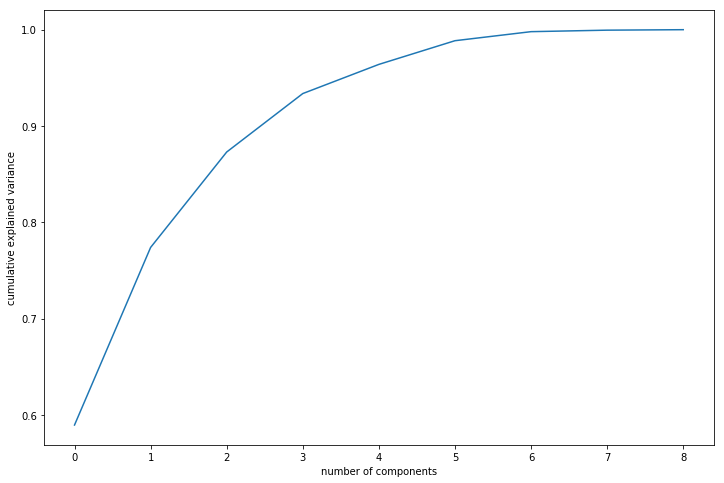

In [97]:
#Plotting the scree plot

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Around 93% of the information is being explained by 4 components

In [98]:
#Understanding how the original 9 variables are loaded on the principal components. It can be verified from above as well.

colnames = list(country_data.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2], 'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052
1,exports,0.342887,0.397311,-0.030574,0.449425
2,health,0.358535,0.155053,-0.075703,-0.599712
3,imports,0.344865,0.370781,-0.072174,0.461798
4,income,0.380041,0.128384,0.145764,-0.154806
5,inflation,-0.143085,0.221261,0.948419,-0.007628
6,life_expec,0.343857,-0.369820,0.196752,-0.018395
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928
8,gdpp,0.399988,0.200624,0.010339,-0.364772


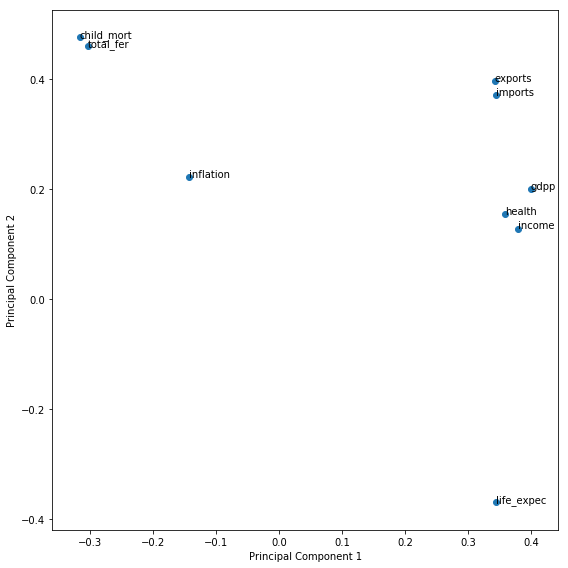

In [99]:
# Let's plot them to visualise how these features are loaded

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [100]:
#Finally let's go ahead and do dimenstionality reduction using the four Principal Components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [101]:
df_pca = pca_final.fit_transform(country_data2)
df_pca.shape

(167, 4)

In [102]:
df_pca

array([[-2.63664719e+00,  1.47208541e+00, -5.46499687e-01,
         2.37267111e-01],
       [-2.38453563e-02, -1.43581581e+00, -9.07965149e-03,
        -4.42921246e-01],
       [-4.59260048e-01, -6.78793979e-01,  9.67851701e-01,
        -1.76389183e-01],
       [-2.72358099e+00,  2.17601815e+00,  5.97793905e-01,
         4.38918801e-01],
       [ 6.48777079e-01, -1.02649806e+00, -2.44170307e-01,
        -2.67513413e-01],
       [ 3.64467926e-02, -6.84622218e-01,  1.46536060e+00,
         6.60677268e-02],
       [-3.34274149e-01, -1.27903261e+00,  1.90771929e-01,
        -5.01435384e-01],
       [ 3.18436150e+00, -2.38373184e-01, -1.68539991e-01,
         1.66969553e+00],
       [ 3.81813720e+00,  2.62613732e-01, -2.97336122e-01,
         9.74405166e-01],
       [-4.67475427e-01, -4.94060580e-01,  6.08605487e-01,
        -2.58516905e-01],
       [ 1.49957973e+00, -4.25884552e-01, -5.57799928e-01,
         2.24968322e-01],
       [ 1.47129299e+00, -3.25734384e-01,  4.26551347e-01,
      

In [103]:
#Creating a transpose so that the each column is properly arranged

pc = np.transpose(df_pca)

In [104]:
#Merging country from original dataset back

pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3]})
pcs_df2 = pd.merge(country, pcs_df2, left_index=True, right_index=True)
pcs_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


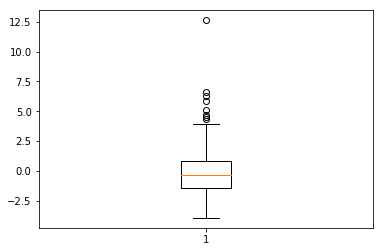

In [105]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later

plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.25)
Q3 = pcs_df2.PC1.quantile(0.75)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1 - 1.5*IQR) & (pcs_df2.PC1 <= Q3 + 1.5*IQR)]

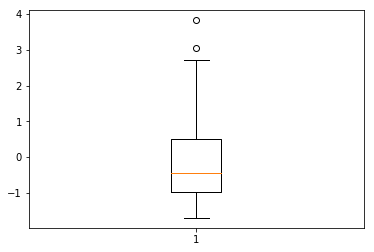

In [106]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.25)
Q3 = pcs_df2.PC2.quantile(0.75)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1 - 1.5*IQR) & (pcs_df2.PC2 <= Q3 + 1.5*IQR)]

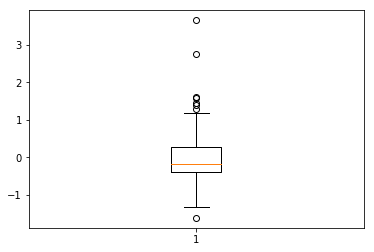

In [107]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.25)
Q3 = pcs_df2.PC3.quantile(0.75)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1 - 1.5*IQR) & (pcs_df2.PC3 <= Q3 + 1.5*IQR)]

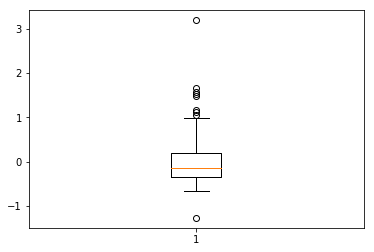

In [108]:
plt.boxplot(pcs_df2.PC4)
Q1 = pcs_df2.PC4.quantile(0.25)
Q3 = pcs_df2.PC4.quantile(0.75)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC4 >= Q1 - 1.5*IQR) & (pcs_df2.PC4 <= Q3 + 1.5*IQR)]

In [109]:
#Inspecting shape after outlier removal
pcs_df2.shape

(140, 5)

In [110]:
pcs_df2_country = pcs_df2.country.reset_index(drop=True)
pcs_df2 = pcs_df2.drop(["country"], axis = 1)

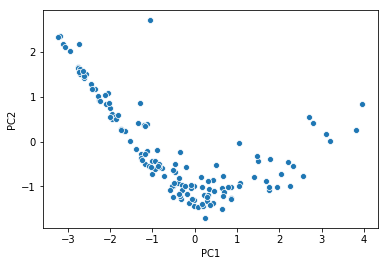

In [111]:
# Visualising the points on the PCs.
# One of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data = pcs_df2)

In [112]:
#Let's go ahead and begin with the clustering process

## Clustering - K-Means

In [113]:
#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [114]:
#Let's check the Hopkins measure

hopkins(pcs_df2)

0.7885340009596529

In [115]:
#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [116]:
dat3_1 = pcs_df2

### K- means Clustering

In [117]:
#First we'll do the silhouette score analysis

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

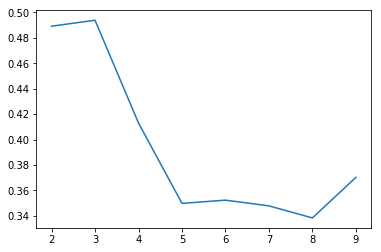

In [118]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

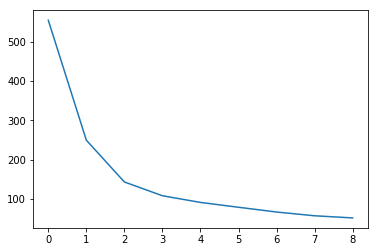

In [119]:
## From the above analysis we find that 3 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [120]:
#Here also we're seeing a distinct bend at around 3 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [121]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.636647,1.472085,-0.546500,0.237267,0
1,-0.023845,-1.435816,-0.009080,-0.442921,2
2,-0.459260,-0.678794,0.967852,-0.176389,2
3,-2.723581,2.176018,0.597794,0.438919,0
4,0.648777,-1.026498,-0.244170,-0.267513,2


In [122]:
# Checking the counties in different clusters
dat_km['ClusterID'].value_counts()

2    76
0    44
1    20
Name: ClusterID, dtype: int64

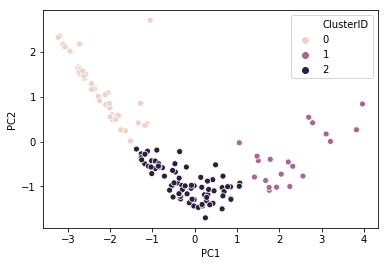

In [123]:
# Creating a scatter plot to visualise distribution of countries
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [124]:
dat_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.636647,1.472085,-0.546500,0.237267,0
1,-0.023845,-1.435816,-0.009080,-0.442921,2
2,-0.459260,-0.678794,0.967852,-0.176389,2
3,-2.723581,2.176018,0.597794,0.438919,0
4,0.648777,-1.026498,-0.244170,-0.267513,2


In [125]:
pcs_df2_country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [126]:
dat5=pd.merge(pcs_df2_country,dat_km, left_index=True,right_index=True)
dat5.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,2
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,2
3,Angola,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,2


In [127]:
dat6=dat5.drop(['PC1','PC2', 'PC3', 'PC4'],axis=1)
dat6.head()

,country,ClusterID
0,Afghanistan,0
1,Albania,2
2,Algeria,2
3,Angola,0
4,Antigua and Barbuda,2


In [128]:
# Final set which contains original data with clusterID

dat6 = dat6.merge(country_dataframe, on = "country", how = "inner")
dat6.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,2,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,0,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,2,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [129]:
#So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

## Analysis of the clusters

In [130]:
# Calculating mean of different vars

clu_child_mort = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [131]:
df = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health,clu_imports, clu_income, clu_inflation, clu_life_expec, clu_total_fer, clu_gdpp], axis=1)

In [132]:
df.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,87.447727,940.282841,113.670425,857.833114,4038.295455,9.858523,59.825000,4.977500,1922.818182
1,1,5.780000,15278.950000,2498.288000,13892.205000,36900.000000,3.272700,79.085000,1.821500,30690.000000
2,2,22.417105,2616.788007,383.481663,2858.415672,11405.526316,6.190250,72.867105,2.265658,5890.947368


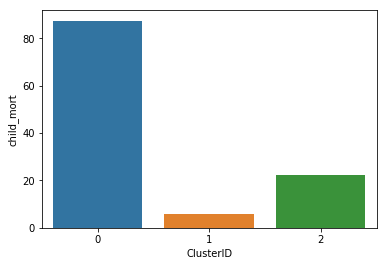

In [133]:
sns.barplot(x=df.ClusterID, y=df.child_mort)

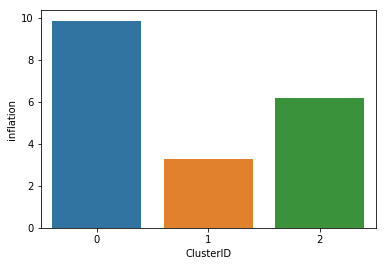

In [134]:
sns.barplot(x=df.ClusterID, y=df.inflation)

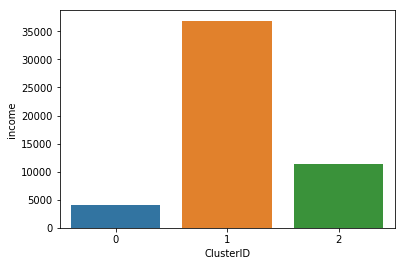

In [135]:
sns.barplot(x=df.ClusterID, y=df.income)

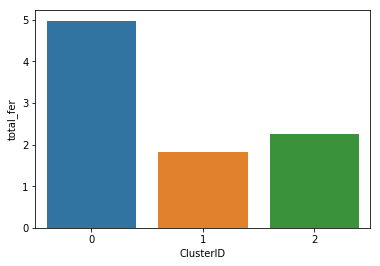

In [136]:
sns.barplot(x=df.ClusterID, y=df.total_fer)

## By the analysis, we divide the clusters as -
### Poor Nations - Cluster 0
### Developed Nations - Cluster 1
### Developing Nations - Cluster 2

### So we determine the countries which require assistance are those which have all the metrics below average in their cluster, ie cluster 0

In [137]:
fin=country_dataframe[country_dataframe['child_mort']>=87.45]
fin=fin[fin['exports']<=940.28]
fin=fin[fin['health']<=113.67]
fin=fin[fin['imports']<=857.93]
fin=fin[fin['income']<=4038.30]
fin=fin[fin['inflation']>=9.85]
fin=fin[fin['life_expec']<=59.93]
fin=fin[fin['total_fer']>=4.98]
fin=fin[fin['gdpp']<=1922.92]

fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.3,57.7,6.26,231.0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.8,57.5,6.54,334.0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.1,58.0,5.34,648.0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.1,53.1,5.31,459.0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.2,55.0,5.20,399.0


### The countries which require funding are
### 1. Burundi
### 2. Congo, Dem. Rep.
### 3. Guinea
### 4. Malawi
### 5. Sierra Leone

# Now trying the approach with K=2 , i.e. 2 clusters

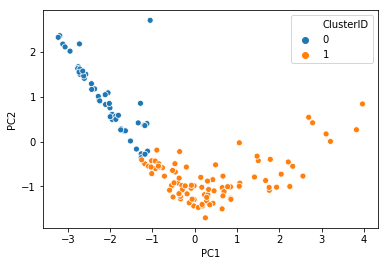

In [138]:
model_clus2 = KMeans(n_clusters=2, max_iter=50, random_state=50)
model_clus2.fit(dat3_1)
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
dat_km.head()
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [139]:
dat5=pd.merge(pcs_df2_country,dat_km, left_index=True,right_index=True)
dat6=dat5.drop(['PC1','PC2','PC3', 'PC4'],axis=1)
dat6 = dat6.merge(country_dataframe, on = "country", how = "inner")
dat6.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,1,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,0,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,1,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [140]:
clu_child_mort = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1]),clu_child_mort,clu_exports,clu_health,clu_imports, clu_income, clu_inflation, clu_life_expec, clu_total_fer, clu_gdpp], axis=1)

df.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,83.520408,894.789876,115.955402,865.824818,3963.571429,9.565612,60.47551,4.785510,1908.367347
1,1,17.302198,5516.292633,861.868686,5389.043209,17453.736264,5.505198,74.60000,2.122418,11567.098901


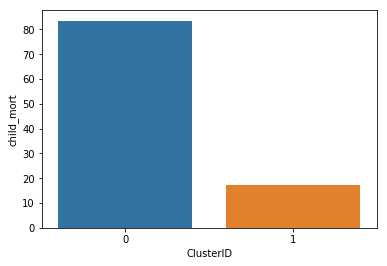

In [141]:
sns.barplot(x=df.ClusterID, y=df.child_mort)

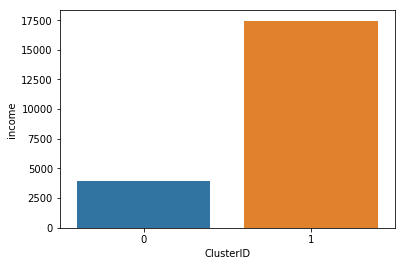

In [142]:
sns.barplot(x=df.ClusterID, y=df.income)

## By the analysis, we divide the clusters as -
### Poor Nations - Cluster 0
### Developed Nations - Cluster 1

### So we determine the countries which require assistance are those which have all the metrics below average in their cluster, ie cluster 0

In [143]:
fin=country_dataframe[country_dataframe['child_mort']>=72.429688]
fin=fin[fin['exports']<=897.558024]
fin=fin[fin['health']<=114.731814]
fin=fin[fin['imports']<=921.026845]
fin=fin[fin['income']<=4339.296875]
fin=fin[fin['inflation']>=9.090391]
fin=fin[fin['life_expec']<=62.465625]
fin=fin[fin['total_fer']>=4.368125]
fin=fin[fin['gdpp']<=2010.718750]

fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648.0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0
155,Uganda,81.0,101.7450,53.6095,170.170,1540.0,10.60,56.8,6.15,595.0
166,Zambia,83.1,540.2000,85.9940,451.140,3280.0,14.00,52.0,5.40,1460.0


### The countries which require funding are
### 1. Afghanistan
### 2. Burundi
### 3. Congo, Dem. Rep.
### 4. Guinea
### 5. Malawi
### 6. Sierra Leone
### 7. Uganda
### 8. Zambia

# Now we will confirm our analysis by using Heirarchical clustering

## Heirarchical Clustering

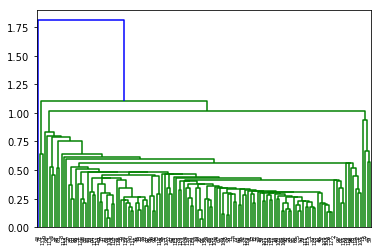

In [144]:
# heirarchical clustering using single linkage

mergings = linkage(pcs_df2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

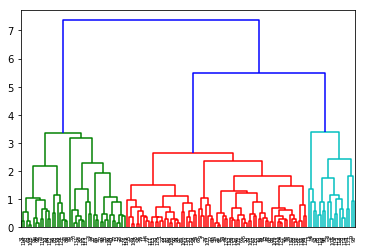

In [145]:
# heirarchical clustering using complete linkage

mergings = linkage(pcs_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

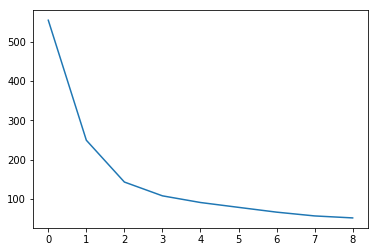

In [146]:
# sum of squared distances

ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

## Elbow curve shows to cut dendrogram at 3 clusters

In [147]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
pc_hc = pd.concat([pcs_df2, clusterCut], axis=1)
pc_hc.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
pc_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.636647,1.472085,-0.546500,0.237267,0
1,-0.023845,-1.435816,-0.009080,-0.442921,1
2,-0.459260,-0.678794,0.967852,-0.176389,1
3,-2.723581,2.176018,0.597794,0.438919,0
4,0.648777,-1.026498,-0.244170,-0.267513,1


In [148]:
dat5=pd.merge(pcs_df2_country,pc_hc, left_index=True,right_index=True)
dat5.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,1
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,1


In [149]:
#merging the dataset
dat6=dat5.drop(['PC1','PC2', 'PC3', 'PC4'],axis=1)
dat6.head()
dat6 = dat6.merge(country_dataframe, on = "country", how = "inner")
dat6.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,1,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,0,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,1,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [150]:
clu_child_mort = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [151]:
df = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health,clu_imports, clu_income, clu_inflation, clu_life_expec, clu_total_fer, clu_gdpp], axis=1)

In [152]:
df.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,87.447727,940.282841,113.670425,857.833114,4038.295455,9.858523,59.825000,4.977500,1922.818182
1,1,22.417105,2616.788007,383.481663,2858.415672,11405.526316,6.190250,72.867105,2.265658,5890.947368
2,2,5.780000,15278.950000,2498.288000,13892.205000,36900.000000,3.272700,79.085000,1.821500,30690.000000


## By the analysis, we divide the clusters as -
### Poor Nations - Cluster 0
### Developed Nations - Cluster 2
### Developing Nations - Cluster 1

### So we determine the countries which require assistance are those which have all the metrics below average in their cluster, ie cluster 0

In [153]:
fin=country_dataframe[country_dataframe['child_mort']>=87.47]
fin=fin[fin['exports']<=940.28]
fin=fin[fin['health']<=113.67]
fin=fin[fin['imports']<=857.83]
fin=fin[fin['income']<=4038.30]
fin=fin[fin['inflation']>=9.86]
fin=fin[fin['life_expec']<=59.83]
fin=fin[fin['total_fer']>=4.98]
fin=fin[fin['gdpp']<=1922.82]

fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.3,57.7,6.26,231.0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.8,57.5,6.54,334.0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.1,58.0,5.34,648.0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.1,53.1,5.31,459.0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.2,55.0,5.20,399.0


# FINAL LIST OF COUNTRIES WHICH SHOULD BE GIVEN FUNDING :
### 1. Burundi
### 2. Congo, Dem. Rep.
### 3. Guinea
### 4. Malawi
### 5. Sierra Leone